# PyDCM JupyterLab Notebook to fit MDCM charges from a Gaussian Cube file

# Setup: Define these variables for your system:
You should check and set these variables by hand for your system

In [1]:
import sys
ars_path = "/home/boittier/pydcm/"
sys.path.insert(1, ars_path)
from pydcm import *

# The Gaussian-format cube file containing electron density:
refDensCube="/home/boittier/B.pdb/SCAN_1_2_3_4_S_36_10.0/18_SCAN/B.d.cube"
# The Gaussian-format cube file containing electrostatic potential energy:
refPotCube="/home/boittier/B.pdb/SCAN_1_2_3_4_S_36_10.0/18_SCAN/B.p.cube"
# The root folder for your fitting project
projDir="/home/boittier/pydcm/models/fbutadiene-18"
# The bin directory containing the MDCM scripts and programs
refBinDir="/home/boittier/pydcm/bin"
# The total charge of the molecule to be fitted (a.u.)
qtot=0.0
# The port to use for the local web browser (to view molecules in NGL). Make sure nobody else is using it already!
webPort='8881'
# The name of a Slurm partition allowing jobs to run for up to 2 hours with 4 cores
shortQ='vshort'
longQ='infinite'
# The desired isodensity surface to use for viewing potential energy surfaces (a.u)
isoSurf=0.001

# Number of refinement iterations for each fit. More is better, but each fit will take longer
ntry=4
# Maximum number of charges to fit per atom (minimum is fixed at 1)
maxAChg=4

minMChg=18
maxMChg=54

natm=10
nfrag = 4

# Define fragments using atom numbering from NGL window at top of notebook
frags=[[9, 10, 4],[3,8],[7,2],[5,1,6]]
# Minimum number of charges to fit for each fragment (can average fewer than 1 per atom)
minFChg=[3,2,2,3]
# Maximum number of charges to fit for each fragment (upper limit per atom fixed by maxAChg)
maxFChg=[12,8,8,12]



workdir = projDir + '/'
refdir = workdir + 'ref/'
htmldir = workdir + 'html/'
bindir = refBinDir + '/'
pdbfile = refdir + 'mol.pdb'
densCube = refdir + os.path.basename(refDensCube)
potCube = refdir + os.path.basename(refPotCube)

## Step 1: Load files and view reference ESP

### Create the desired folder structure and copy files there
This will use the "projDir" you selected as the root directory for this fitting project, copying reference files there and creating new files and subfolders as necessary.

In [2]:
coords = make_ref_directory(projDir, refBinDir, refDensCube, refPotCube)

Changed to working directory /home/boittier/pydcm/models/fbutadiene-18/
10 atoms in molecule
writing PDB file  /home/boittier/pydcm/models/fbutadiene-18/ref/mol.pdb


### Start local web server
If it worked then you should see something like "Serving HTTP on 0.0.0.0 port 8000 (http://0.0.0.0:8000/) ..." in the console where you started jupyter-lab. The port will be the webPort you set above.

In [3]:
start_server(workdir, bindir, webPort)

python /home/boittier/pydcm/bin/simple-cors-http-server.py 8881Running jobs:

0 : run_http()

Web server running in directory /home/boittier/pydcm/models/fbutadiene-18, URLs are relative to this path
If you change the project directory, you need to restart Jupyter-Lab to restart this server and create a new root for URLs


### The next cell loads your selected reference Gaussian cube files and prepares an HTML script to plot the ESP on a molecular isodensity surface

In [4]:
display, maxESP = show_ref_models(densCube, potCube, htmldir, webPort, pdbfile, isoSurf=0.001)
display

ESP range: -0.0376363 to 0.0376363 a.u.
8881 /home/boittier/pydcm/models/fbutadiene-18/html/ /home/boittier/pydcm/models/fbutadiene-18/ref/mol.pdb
http://localhost:8881/html/refESP.html


## Step 2: Fit multipoles to reference ESP



In [5]:
mtpfile, display = display_mtpfit_comparison(workdir, bindir, htmldir, potCube, densCube, qtot, webPort, maxESP, isoSurf=0.001)
display

/home/boittier/pydcm/bin/mtpfit.py


## Step 3: Fit atomic charge models using atomic multipoles from step 2

Now the atomic multipoles are available, we can fit atomic charge models to them. This step is fast for 1 or 2 charges, but already takes up to an hour or so for 4 charges if the ESP grid you provided contains a lot of grid points (i.e. is a relatively fine or large grid)


## 1Charges Per Atom:
Atom 1 final RMSE: 1.446928536 kcal/mol
Atom 2 final RMSE: 2.07993862 kcal/mol
Atom 3 final RMSE: 3.498692228 kcal/mol
Atom 4 final RMSE: 3.211602896 kcal/mol
Atom 5 final RMSE: 1.196851843 kcal/mol
Atom 6 final RMSE: 0.8629574152 kcal/mol
Atom 7 final RMSE: 1.558089887 kcal/mol
Atom 8 final RMSE: 1.622695458 kcal/mol
Atom 9 final RMSE: 1.040344206 kcal/mol
Atom 10 final RMSE: 1.422295607 kcal/mol

## 2Charges Per Atom:
Atom 1 final RMSE: 0.9044939257 kcal/mol
Atom 2 final RMSE: 0.9555555014 kcal/mol
Atom 3 final RMSE: 0.5418775349 kcal/mol
Atom 4 final RMSE: 1.044094666 kcal/mol
Atom 5 final RMSE: 0.6421105077 kcal/mol
Atom 6 final RMSE: 0.3933102831 kcal/mol
Atom 7 final RMSE: 0.9201649474 kcal/mol
Atom 8 final RMSE: 0.9661994525 kcal/mol
Atom 9 final RMSE: 0.75884556 kcal/mol
Atom 10 final RMSE: 0.5113665347 kcal/mol

## 3Charges Per Atom:
Atom 1 final RMSE: 0.1803202494 kcal/mol
Atom 2 final RMSE: 0.3205186466 kcal/mol
Atom 3 final RMSE: 0.2357224029 kcal/mol

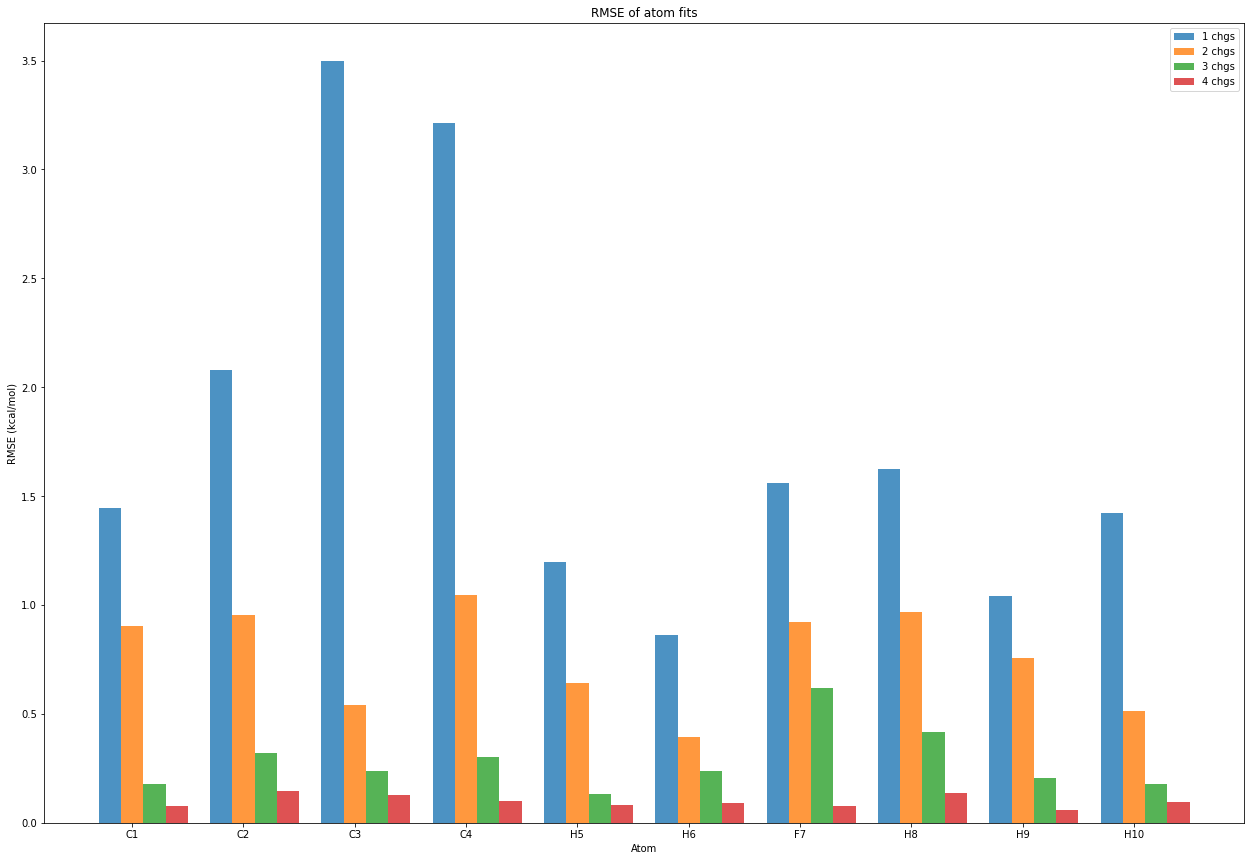

In [10]:
# Number of refinement iterations for each fit. More is better, but each fit will take longer
ntry=4
# Maximum number of charges to fit per atom (minimum is fixed at 1)
maxAChg=4

natm=10
nfrag = 4

# START OF USER VARIABLES

# Number of refinement iterations for each fit. More is better, but each fit will take longer
ntry=4
# Number of separate fits to perform (restarting a fit can lead to a better outcome). Cost scales linearly
nfit=2
# Define fragments using atom numbering from NGL window at top of notebook
frags=[[9, 10, 4],[3,8],[7,2],[5,1,6]]
# Minimum number of charges to fit for each fragment (can average fewer than 1 per atom)
minFChg=[3,2,2,3]
# Maximum number of charges to fit for each fragment (upper limit per atom fixed by maxAChg)
maxFChg=[12,8,8,12]

atomdir=workdir+'2-atomfit/'

rmse = do_atom_fit(workdir, bindir, natm, maxAChg, shortQ, mtpfile, potCube, densCube, ntry, coords, nfrag)

## Step 4: Fit fragment charge models using atomic charge models from step 3

The atomic charge models can now be used to generate an initial population for Differential Evolution fitting of fragment charge models. You need to define the fragments using their atom indices at the top of the cell (the NGL window at the top of the notebook shows the molecular structure with the atom numbers). You should also define the maximum and minimum number of charges you'd like to try per fragment. Note that you can use less than one charge on average per fragment atom if you wish, but you can't use more than maxAChg charges per atom (see previous cell for maxAChg)

In [11]:
fit_fragments(workdir, frags, nfit, natm, maxAChg, atomdir, minFChg, 
                  maxFChg, longQ, bindir, refdir, mtpfile, potCube,
                   densCube, ntry, htmldir, webPort, pdbfile)

submitted jobID 3481409
submitted jobID 3481410
submitted jobID 3481411
submitted jobID 3481412
submitted jobID 3481413
submitted jobID 3481414
submitted jobID 3481415
submitted jobID 3481416
submitted jobID 3481417
submitted jobID 3481418
submitted jobID 3481419
submitted jobID 3481420
submitted jobID 3481421
submitted jobID 3481422
submitted jobID 3481423
submitted jobID 3481424
submitted jobID 3481425
submitted jobID 3481426
submitted jobID 3481427
submitted jobID 3481428
submitted jobID 3481429
submitted jobID 3481430
submitted jobID 3481431
submitted jobID 3481432
submitted jobID 3481433
submitted jobID 3481434
submitted jobID 3481435
submitted jobID 3481436
submitted jobID 3481437
submitted jobID 3481438
submitted jobID 3481439
submitted jobID 3481440
submitted jobID 3481441
submitted jobID 3481442
submitted jobID 3481443
submitted jobID 3481444
submitted jobID 3481445
submitted jobID 3481446
submitted jobID 3481447
submitted jobID 3481448
submitted jobID 3481449
submitted jobID 

IndexError: list index out of range

## Step 5: Combine fragments to build a molecular model

In this step for each desired total number of charges for the whole molecule, all possible permutations of the fragment models are combined to find the lowest RMSE. For example, if there are 2 fragments and we request 6 charges for the molecule then we can try 5 charges from fragment 1 and 1 charge from fragment 2, or 4 charges from fragment 1 and 2 charges from fragment 2 and so on. Note that the RMSE is just an estimate based on the individual RMSEs of the fragments.

In [ ]:
minMChg=18
maxMChg=54

combine_fragements(workdir, minMChg, maxMChg, minFChg, maxFChg, 
                   frags, bindir, nfit, fragdir, htmldir, pdbfile, webPort):
    

## Step 6: Refine molecular models

In this step the molecular models produced by combining fragment MDCMs are refined in a final simplex opimization

In [ ]:
refine_models(workdir,  maxMChg , minMChg, combdir, longQ,
                  bindir, mtpfile, potCube, densCube, maxAChg, webPort, pdbfile)

## Step 6: Analysis

In this step individual models can be examined in detail in terms of their performance compared to different multipole models with visualization of the ESP surface.

In [ ]:
nchg = 30
#
analyse_model(workdir, refinedir, nchg, mtpdir, bindir, potCube, densCube, qtot, htmldir, webPort, isoSurf=0.001) 

## Step 7: Export to CHARMM

In this step the models can be exported in a format to be read by CHARMM's "DCM" module, defining charge positions relative to local axes to allow molecular dynamics simulation or energy calculations after conformational change.

In [ ]:

# cd /home/unibas/boittier/pydcm-1.2/test2/
#python ~/get_frames.py ref/mol.pdb LIG
# cd /home/unibas/boittier/pydcm-1.2/test2/7-to-charmm
#../../bin/comb-xyz-to-dcm.pl ../5-refine/30-charges/30_charges_refined.xyz ../ref/N.p.cube ../../frame.txt butone-cf3-eq.dcm 
